In [82]:
import os, random, seaborn as sb
import numpy as np, matplotlib.pyplot as plt
import pandas as pd, itertools
from sklearn.metrics import confusion_matrix

## Read the dataset csv file

In [83]:
colab_path = "C:/Users/yadik/Desktop/final_code/data"
# colab_path = "C:/Users/USER/OneDrive - ort braude college of engineering/Desktop/data"
data_base_name = "data_base_Holly_Koran"

In [84]:
data_txts = []
data_labels = []

for root, ds, fs in os.walk(os.path.join(colab_path, data_base_name)):
    for file in fs:
        if root.split("\\")[-1] != data_base_name:
            print("+", root, " ", file)
            label = root.split("\\")[-1]
            with open(os.path.join(root, file), 'r', encoding = "utf-8") as txtfile:
                txt = txtfile.read()
                data_txts.append(txt)
                data_labels.append(label)        

+ C:/Users/yadik/Desktop/final_code/data\data_base_Holly_Koran\Holly Koran   القران الكريم.txt
+ C:/Users/yadik/Desktop/final_code/data\data_base_Holly_Koran\imposters\أميرة علي عبد الصادق   أحدب نوتردام.txt
+ C:/Users/yadik/Desktop/final_code/data\data_base_Holly_Koran\imposters\أميرة علي عبد الصادق   الاخ الاصغر.txt
+ C:/Users/yadik/Desktop/final_code/data\data_base_Holly_Koran\imposters\أميرة علي عبد الصادق   الامير والفقير.txt
+ C:/Users/yadik/Desktop/final_code/data\data_base_Holly_Koran\imposters\أميرة علي عبد الصادق   الخروج دون حفظ.txt
+ C:/Users/yadik/Desktop/final_code/data\data_base_Holly_Koran\imposters\احلام مستغانمي   الأسود يليق بكِ.txt
+ C:/Users/yadik/Desktop/final_code/data\data_base_Holly_Koran\imposters\تامر إبراهيم   نحن.txt
+ C:/Users/yadik/Desktop/final_code/data\data_base_Holly_Koran\imposters\جبران خليل جبران   الاجنحة المتكسرة.txt
+ C:/Users/yadik/Desktop/final_code/data\data_base_Holly_Koran\imposters\جبران خليل جبران   الاحلام المتمردة.txt
+ C:/Users/yadik/D

In [85]:
np.unique(data_labels)

array(['Holly Koran', 'أميرة علي عبد الصادق', 'احلام مستغانمي',
       'تامر إبراهيم', 'جبران خليل جبران', 'جرجي زيدان',
       'د. أحمد خالد توفيق', 'د. سليمان زيدان',
       'رياض محمد إسليم الحلايقه', 'سلامة موسى', 'سيد قطـب',
       'صلاح الدين ذهني', 'طه حسين', 'عبد الكريم ناصيف',
       'عبدالسلام المودني', 'غانم خليل', 'فرح انطون', 'مارون عبود',
       'محمد بدر السالم', 'مي زيادة', 'نبيل فاروق', 'نقولا حداد',
       'هدى حسين', 'وردة الصولي'], dtype='<U24')

In [86]:
df = pd.DataFrame({
                    "txt": data_txts,
                    "label": data_labels
                  })
df

,txt,label
0,﻿سورة الفاتحة القرآن الكريم :\nبِسْمِ اللَّهِ ...,Holly Koran
1,﻿أحدب نوتردام\nترجمة\n أميرة علي عبد الصادق \n...,أميرة علي عبد الصادق
2,﻿الأخ الأصغر\nالأخ الأصغر\nترجمة\n أميرة علي ع...,أميرة علي عبد الصادق
3,﻿\n \n \n\n الأمير والفقير\n\n \t تأليف\n مار...,أميرة علي عبد الصادق
4,﻿الخروج دون حفظ\nتأليف\n روث نستفولد \nترجمة\n...,أميرة علي عبد الصادق
5,﻿\nالأسود يليق بكِ\nأحلام مستغانمي\n\n\n\n\n\n...,احلام مستغانمي
6,﻿نحن \nقصة \nتامر إبراهيم\n\n\n\n\n\n\n (1)\n\...,تامر إبراهيم
7,﻿جبران خليل جبران\nالأجنحة المتكسرة ـ 1 ـ توطئ...,جبران خليل جبران
8,﻿\n \n \n\n الأرواح المتمردة\n\n \t تأليف\n ج...,جبران خليل جبران
9,﻿\n \n \n\n \n \n\n\n\n \n\n \n \n \nأبو مسلم...,جرجي زيدان


## Process the data

In [87]:
pip install arabert

Note: you may need to restart the kernel to use updated packages.


In [88]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download("stopwords")
import string
import numpy as np
from arabert.preprocess import ArabertPreprocessor
from transformers import AutoTokenizer
from sklearn.preprocessing import LabelEncoder

model_name = "aubmindlab/bert-large-arabertv02"
arabert_prep = ArabertPreprocessor(model_name = model_name)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yadik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [89]:
emb_dim = 300
chunk_size = 10

In [90]:
def preprocessing_stage(text):
    try:
        text = arabert_prep.preprocess(text)
        # Split into words
        tokens = word_tokenize(text)
        # Convert to lowercase
        tokens = [w.lower() for w in tokens]
        # Remove punctuation from each word
        arabic_punctuation = '،؟؛'
        all_punctuation = string.punctuation + arabic_punctuation
        table = str.maketrans('', '', all_punctuation) 
        stripped = [w.translate(table) for w in tokens]
        # Remove remaining tokens that are not alphabetic
        words = [word for word in stripped if word.isalnum()]
        # Filter out stop words
        stop_words = set(stopwords.words('arabic'))
        words = [w for w in words if not w in stop_words]
        # Elemintate the Nan Values
        words = [x for x in words if str(x) != 'nan']
        words = " ".join(words)
        return words
    except Exception as e:
        print("ERROR in preprocessing_stage: " + e.args[0])
        return None

### arabBert_algorithm

In [91]:
from transformers import AutoTokenizer, AutoModel, pipeline, BertForSequenceClassification
import torch

tokenizer = AutoTokenizer.from_pretrained("asafaya/bert-base-arabic")
def arabBert_algorithm(txt, tokenizer, dimension):
    try:
        wv = tokenizer(txt, return_tensors = 'np', max_length = dimension, truncation = True, padding = True)
        return wv["input_ids"]
    except Exception as e:
        print("ERROR in arabBert_algorithm:" + e.args[0])

In [92]:
preprocessed_phrases = []
labels = []
wv_phrases = []

for txt,label in zip(df.txt,df.label):
    phrases = txt.split("\n")
    phrases = [x for x in phrases if str(x) != '']
    for phrase in phrases:
        processed_text = preprocessing_stage(phrase)
        if processed_text != '':
            # print("+", phrase, "--", processed_text)
            preprocessed_phrases.append(processed_text)
            wv = arabBert_algorithm(preprocessed_phrases[-1], tokenizer, emb_dim)
            wv = np.pad(wv.reshape(-1), (0, emb_dim), 'constant')
            wv_phrases.append(wv[:emb_dim])
            labels.append(label)

In [93]:
print(len(labels))
print(len(preprocessed_phrases))
print(len(wv_phrases))

51645
51645
51645


In [94]:
df_wv = pd.DataFrame({
                        "txt": preprocessed_phrases,
                        "wv": wv_phrases,
                        "label": labels
                     })
df_wv

,txt,wv,label
0,سورة الفاتحة القرآن الكريم,"[2, 4515, 15098, 2930, 3003, 3, 0, 0, 0, 0, 0,...",Holly Koran
1,بسم الله الرحمن الرحيم 1,"[2, 7994, 1808, 3727, 7108, 21, 3, 0, 0, 0, 0,...",Holly Koran
2,الحمد لله رب العالمين 2 الرحمن الرحيم 3 مالك ي...,"[2, 6396, 3519, 2963, 9277, 22, 3727, 7108, 23...",Holly Koran
3,سورة البقرة,"[2, 4515, 7503, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Holly Koran
4,بسم الله الرحمن الرحيم,"[2, 7994, 1808, 3727, 7108, 3, 0, 0, 0, 0, 0, ...",Holly Koran
...,...,...,...
51640,ليلة أطول شهر شعرت كعادتي بضيقة شديدة ففررت لر...,"[2, 5613, 13225, 2857, 17412, 30258, 2078, 663...",وردة الصولي
51641,رأيت إبليس بقرنيه الطويلين ورأسه الحليق يضحك و...,"[2, 6719, 17869, 2331, 1918, 1798, 10507, 1724...",وردة الصولي
51642,تصاعد الألم شبر جسدي وصل ذروته بدأت أفقد الإحس...,"[2, 20030, 4042, 29905, 11394, 1016, 3685, 164...",وردة الصولي
51643,صعدت روحي حلوة خفيفة اغتسلت نهر زكي العلياء فا...,"[2, 22954, 1013, 21610, 20181, 13698, 11401, 1...",وردة الصولي


### Data Balacing (Palce the Classes)

In [95]:
# Balcing The data
print("The total before balacing is:", len(df_wv))
print("Holly Koran", len(df_wv[df_wv.label == "Holly Koran"]))
print("others", len(df_wv[df_wv.label != "Holly Koran"]))

The total before balacing is: 51645
Holly Koran 679
others 50966


In [96]:
new_df = df_wv[df_wv.label != "Holly Koran"].sample(
                                                    n = min( 
                                                             len(df_wv[df_wv.label == "Holly Koran"]), 
                                                             len(df_wv[df_wv.label != "Holly Koran"])
                                                           )).append(df_wv[df_wv.label == "Holly Koran"].sample(
                                                                    n = min( 
                                                                             len(df_wv[df_wv.label =="Holly Koran"]), 
                                                                             len(df_wv[df_wv.label !="Holly Koran"]))).copy()
                                                                    )
print("Labels:", new_df.label.unique())
new_df.head()

Labels: ['احلام مستغانمي' 'غانم خليل' 'نقولا حداد' 'أميرة علي عبد الصادق'
 'عبدالسلام المودني' 'نبيل فاروق' 'جرجي زيدان' 'طه حسين' 'فرح انطون'
 'هدى حسين' 'عبد الكريم ناصيف' 'مي زيادة' 'د. أحمد خالد توفيق'
 'صلاح الدين ذهني' 'محمد بدر السالم' 'وردة الصولي'
 'رياض محمد إسليم الحلايقه' 'د. سليمان زيدان' 'مارون عبود' 'سيد قطـب'
 'جبران خليل جبران' 'سلامة موسى' 'تامر إبراهيم' 'Holly Koran']


,txt,wv,label
7188,عهدتك بخيلة نفسك اكتسبت عادة الهدر,"[2, 5609, 2951, 3268, 2294, 6558, 18425, 1013,...",احلام مستغانمي
32979,وماذا قصدك,"[2, 17842, 9476, 1014, 3, 0, 0, 0, 0, 0, 0, 0,...",غانم خليل
47564,وهم الكاهن يقف فغمز جورجي فهيما كأنه يقول تدعه...,"[2, 4139, 19000, 3252, 9234, 18855, 1010, 1043...",نقولا حداد
3414,النشيج صحب حديثي بدل صوتي بصوت آخر فبدا كصوت ح...,"[2, 11242, 2412, 2678, 1019, 2883, 1016, 8710,...",أميرة علي عبد الصادق
2754,جانب سور ساحات السيارات طبعت عبارة تثق أكبر 25...,"[2, 3884, 14531, 22092, 3686, 9420, 1013, 5453...",أميرة علي عبد الصادق


In [97]:
# Label encoding 
new_df.loc[new_df.label != "Holly Koran", "label"] = 0
new_df.loc[new_df.label == "Holly Koran", "label"] = 1
new_df.label.unique()

array([0, 1], dtype=object)

In [98]:
# Balcing The data
print("The total After balacing:", len(new_df))
print("Holly Koran", len(new_df[new_df.label == 1 ]))
print("Others", len(new_df[new_df.label != 0]))

The total After balacing: 1358
Holly Koran 679
Others 679


In [99]:
batch_factor = 2
data_batch_size = chunk_size // batch_factor
print(f"The data_batch_size is: {data_batch_size}")

# Create X, Y
list_wv_txt = []
Y_tmp0 = []
for token, _label in zip(new_df.wv, new_df.label):
    list_wv_txt.append(token.reshape(-1).tolist())
    Y_tmp0.append(_label)
    
list_wv_txt = np.asarray(list_wv_txt)
bloks = len(list_wv_txt) // data_batch_size
print(f"The number of Blocks is: {bloks}")

X_1 = []
Y_tmp1 = []
for kk in range(bloks):
    X_1.append(list_wv_txt[kk * data_batch_size: (kk + 1) * data_batch_size])
    Y_tmp1.append(Y_tmp0[kk * data_batch_size: (kk + 1) * data_batch_size])

The data_batch_size is: 5
The number of Blocks is: 271


In [100]:
Xs = []
Y_tmp2 = []
indices = [i for i, y in enumerate(Y_tmp1) if len(np.unique(y)) > 1]
for ii in range(len(X_1)):
    if ii not in indices:
        Xs.append(X_1[ii])
        Y_tmp2.append(Y_tmp1[ii])
Xs = np.asarray(Xs)

### One Hot encoding

In [101]:
# One Hot encoding the labels: 
# 0 (Impostors) ------> [0, 1],
# 1 (Holly Koran) ------> [1, 0]
Y = []
for y in Y_tmp2:
    if max(y) == 1:
        Y.append([1, 0])
    else:
        Y.append([0, 1])        

## Data Spliting

In [102]:
test_size = 0.2
y_test = []
x_test = []
y_train = []
x_train = []

test_indexs = random.sample(list(range(len(Y))), k = int(len(Y) * test_size))
for i in range(len(Y)):
    if i in test_indexs:
        y_test.append(Y[i])
        x_test.append(Xs[i])
    else:
        y_train.append(Y[i])
        x_train.append(Xs[i])
        
y_test  = np.array(y_test)
x_test  = np.array(x_test)
y_train = np.array(y_train)
x_train = np.array(x_train)
print("Train:")
print("y_train", y_train.shape)
print("x_train", x_train.shape)
print("Test:")
print("y_test", y_test.shape)
print("x_test", x_test.shape)

x_train_duplicated = np.concatenate((x_train, x_train))
y_train_duplicated = np.concatenate((y_train, y_train))
print("Duplicated Train:")
print("x_train", x_train_duplicated.shape)
print("y_train", y_train_duplicated.shape)



x_train_duplicated = np.concatenate((x_train_duplicated, x_train_duplicated))
y_train_duplicated = np.concatenate((y_train_duplicated, y_train_duplicated))



Train:
y_train (216, 2)
x_train (216, 5, 300)
Test:
y_test (54, 2)
x_test (54, 5, 300)
Duplicated Train:
x_train (432, 5, 300)
y_train (432, 2)


## Create the model

In [103]:
import numpy as np
import keras
from keras import Sequential, regularizers, backend as K
from keras.layers import Flatten, Dense, Dropout, BatchNormalization, LeakyReLU, Layer
from keras.layers.convolutional import MaxPooling1D, Conv1D
from keras.callbacks import EarlyStopping
import tensorflow as tf
import gc
import matplotlib.pyplot as plt

global model, word_model

def cnn(X, Y):
    num_classes = 2

    print('Data:')
    print("X data", X.shape)
    print("Y data", Y.shape)
    
    X_train, Y_train = X, Y
    # Creating the model
    model = Sequential()
    model.add(Conv1D(filters = 1000, kernel_size = 2, padding = 'valid', activation = 'relu', input_shape = (data_batch_size, emb_dim)))
    model.add(MaxPooling1D(pool_size = 1))
    model.add(Dropout(0.5))
    model.add(Conv1D(filters = 1000, kernel_size = 2, padding = 'valid', activation = 'relu', input_shape = (data_batch_size, emb_dim)))
    model.add(MaxPooling1D(pool_size = 1))
    model.add(Dropout(0.5))
    model.add(Conv1D(filters = 1000, kernel_size = 2, padding = 'valid', activation = 'relu', input_shape = (data_batch_size, emb_dim)))
    model.add(MaxPooling1D(pool_size = 1))
    model.add(Dropout(0.5))  
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(1024 * 2, activation = 'relu'))
    model.add(Dense(1024, activation = 'relu'))
    model.add(Dense(512, activation = 'relu'))
    model.add(Dense(256, activation = 'relu'))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(32, activation = 'relu'))
    model.add(Dense(2, activation = 'softmax'))
    model.summary()
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

    print('Fit model...')

    history = model.fit(x_train_duplicated, y_train_duplicated, validation_split = test_size, epochs = 8, verbose = 1)
    del X, Y

    gc.collect()

    return model, history

In [104]:
model, history = cnn(x_train_duplicated, y_train_duplicated)

Data:
X data (864, 5, 300)
Y data (864, 2)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 4, 1000)           601000    
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 4, 1000)          0         
 1D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 4, 1000)           0         
                                                                 
 conv1d_10 (Conv1D)          (None, 3, 1000)           2001000   
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 3, 1000)          0         
 g1D)                                                            
                                                                 
 dropout_13

## Train and Evaluate the model

In [105]:
import matplotlib.pyplot as plt

def plot_accuracy_and_loss(history):
    plt.figure(figsize = (20, 10))
    plt.subplot(1, 2, 1)
    plt.suptitle('Optimizer: Adam', fontsize = 16)
    plt.ylabel('Loss', fontsize = 16)
    plt.plot(history.history['loss'], label = 'Training Loss')
    plt.plot(history.history['val_loss'], label = 'Validation Loss')
    plt.legend(loc = 'upper right')
    plt.subplot(1, 2, 2)
    plt.ylabel('Accuracy', fontsize = 16)
    plt.plot(history.history['accuracy'], label = 'Training Accuracy')
    plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
    plt.legend(loc = 'lower right')
    plt.show()

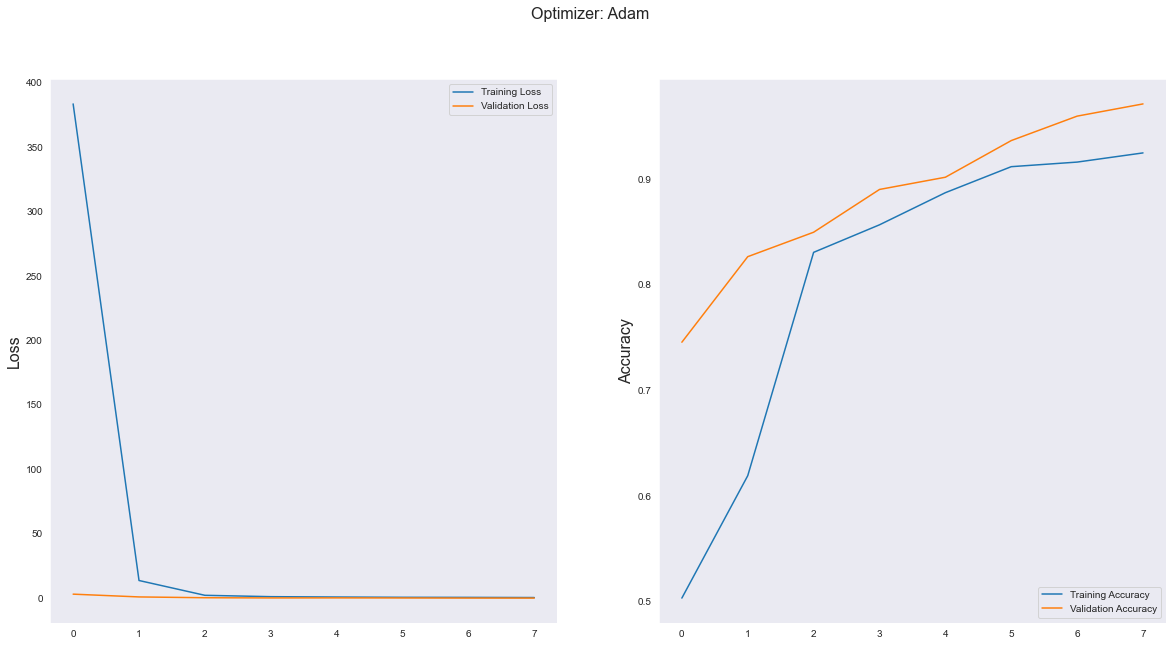

In [106]:
plot_accuracy_and_loss(history)

### Evaluation

In [107]:
# Prediction
y_pred = model.predict(x_test)

2/2 [==============================] - 0s 20ms/step


In [108]:
y_test_ = [i[0] for i in y_test]
y_pred_ = [round(i[0]) for i in y_pred]

In [109]:
def plot_confusion_matrix(ytest, ypred, classes, title = 'Confusion matrix', cmap = plt.cm.Blues):
    cnf_matrix = confusion_matrix(ytest, ypred)
    cm = cnf_matrix
    np.set_printoptions(precision = 2)    
    cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = "center", size = "x-large",
                 color = "white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    sb.set_style("dark")
    plt.figure()
    plt.show()  

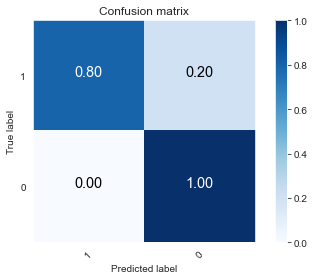

<Figure size 432x288 with 0 Axes>

In [110]:
labels = [1, 0]
plot_confusion_matrix(y_test.argmax(axis = 1), y_pred.argmax(axis = 1), labels, title = 'Confusion matrix', cmap = plt.cm.Blues)

## Get predictions

### Load text

In [111]:
txt_to_classify_file = os.path.join(colab_path, data_base_name, "text to classify.txt")
with open(txt_to_classify_file, "r", encoding = "utf-8") as txt_file:
    txt_to_classify = txt_file.read()

### Split the text into sentences and get tokens (WV)

In [112]:
phrases = txt_to_classify.split("\n")
phrases = [x for x in phrases if str(x) != '']
for phrase in phrases:
    processed_text = preprocessing_stage(phrase)
    if processed_text != '':
        preprocessed_phrases.append(processed_text)
        wv = arabBert_algorithm(preprocessed_phrases[-1], tokenizer, emb_dim)
        wv = np.pad(wv.reshape(-1), (0, emb_dim), 'constant')
        wv_phrases.append(wv[:emb_dim])
        labels.append(label)

In [113]:
# One Hot encoding the labels: 
# 0 (Impostors) ------> [0, 1],
# 1 (Holly Koran) ------> [1, 0]
Xs = []
Y_tmp2 = []
indices = [i for i, y in enumerate(Y_tmp1) if len(np.unique(y)) > 1]
for ii in range(len(X_1)):
    if ii not in indices:
        Xs.append(X_1[ii])
        Y_tmp2.append(Y_tmp1[ii])
Xs = np.asarray(Xs)

Y = []
for y in Y_tmp2:
    if max(y) == 1:
        Y.append([1, 0])
    else:
        Y.append([0, 1])        

In [114]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 24ms/step - loss: 0.4138 - accuracy: 0.8889


[0.41378599405288696, 0.8888888955116272]

In [115]:
prediction = model.predict(Xs)

9/9 [==============================] - 0s 18ms/step


In [116]:
if prediction[0].argmax() == 1:
    res = "Holly Koran"
else:
    res = "Others"
print(f"This text is classed as {prediction[0].argmax()}")
print(f"The label {prediction[0].argmax()} correspond to {res}")

This text is classed as 1
The label 1 correspond to Holly Koran
